<h1><center>Лекція 2.</center></h1>
<h2><center>Візуальний аналіз даних з Python</center></h2>
<h2><center>Частина 1</center></h2>

<a class="anchor" id="2"></a>

## Зміст

1. [Огляд основних бібліотек Python для візуального аналізу даних](#2.1)
    - [Matplotlib](#2.1.1)
    - [Seaborn](#2.1.2)
    - [Plotly](#2.1.3)

<a class="anchor" id="2.1"></a>

## <span style="color:blue; font-size:1em;">2.1. Огляд основних бібліотек Python для візуального аналізу даних</span>

[Повернутися до змісту](#2)

<a class="anchor" id="2.1.1"></a>

### <span style="color:blue; font-size:1em;">2.1.1. Matplotlib</span>

[Повернутися до змісту](#2)

Для початку налаштуємо середовище для написання робочого коду: імпортуємо всі необхідні бібліотеки й налаштуємо відображення рисунків за замовчуванням.

In [1]:
# відключимо додаткові попередження Anaconda (наразі вони нам не потрібні)
import warnings
warnings.simplefilter('ignore')

# будемо відображати графіки безпосередньо в Jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

# задамо графіки у форматі .svg, щоби вони мали кращу чіткість
%config InlineBackend.figure_format = 'svg' 

# підвищимо розмір графіків за замовчуванням
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

Наступний крок - завантажимо в `Dataframe` дані, з якими будемо працювати. Для прикладу візуалізації використаємо дані щодо продажів та оцінок відео-ігор з [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings).

Дані щодо оцінок ігор є не для всіх рядків, тому відразу залишимо тільки ті записи, за якими є повні дані.

In [2]:
video_games_sales_url = 'https://raw.githubusercontent.com/radiukpavlo/Intelligent-data-analysis/main/01_lecture-notes/ida_lecture-02_visual-analytics/video_games_sales.csv'

df = pd.read_csv(video_games_sales_url).dropna()
print(df.shape)

(6825, 16)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [4]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

Загалом в таблиці 6825 об'єктів й 16 ознак для них. Переглянемо декілька перших записів за допомогою методу `head`, щоб переконатися, що всі дані отримано правильно. Для зручності залишимо лише ті ознаки, що даналі будуть використовуватись.

In [5]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


Перед застосуванням методів спеціалізованих бібліотек `Seaborn` і `Plotly`, розглянемо найпростіший і зачасту найбільш зручний засіб для візуальзації даних з `Pandas Dataframe` - це функція` plot`. Наприклад, побудуємо графік продажів відеоігор в різних країнах в залежності від року. Для початку відфільтруємо лише потрібні нам стовпці, потім порахуємо сумарні продажі за роками, а далі в отриманого `Dataframe` викличемо функцію` plot` без параметрів.

Реалізація функції `plot` в бібліотеці `Pandas` ґрунтується на бібліотеці `Matplotlib`.

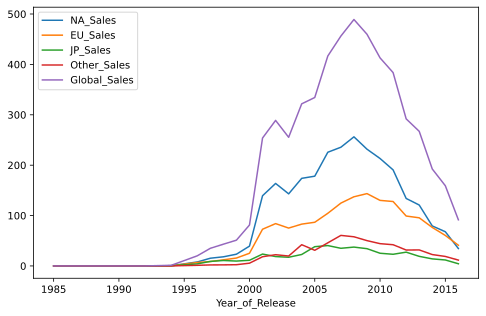

In [6]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

За допомогою параметра `kind` можна змінити тип графіка, наприклад, на `bar chart`. `Matplotlib` дає змогу досить гнучко налаштовувати графіки. Водночас на графіку можна змінити практично все, чого душа забажає. Головне - знайти в документації необхідні параметри. Наприклад, параметр `rot` відповідає за кут нахилу підписів до осі абсцис *хОx*.

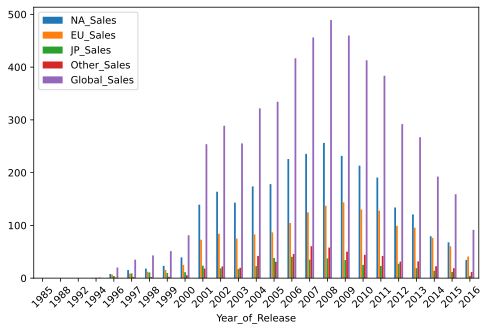

In [7]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

<a class="anchor" id="2.1.2"></a>

### <span style="color:blue; font-size:1em;">2.1.2. Seaborn</span>

[Повернутися до змісту](#2)

Тепер розглянемо бібліотеку `Seaborn`. `Seaborn` - це де факто високорівневе API на основі бібліотеки `Matplotlib`. `Seaborn` дає змогу зручніше налаштовувати оформлення графіків проти `Matplotlib`. Також бібліотека містить складні типи візуалізації, які в `Matplotlib` потребували б значної кількості коду.

Познайомимося з першим таким "складним" типом графіків `pair plot` (scatter plot matrix). Ця візуалізація дає змогу переглянути на одному графіку зв'язок між різними ознаками.

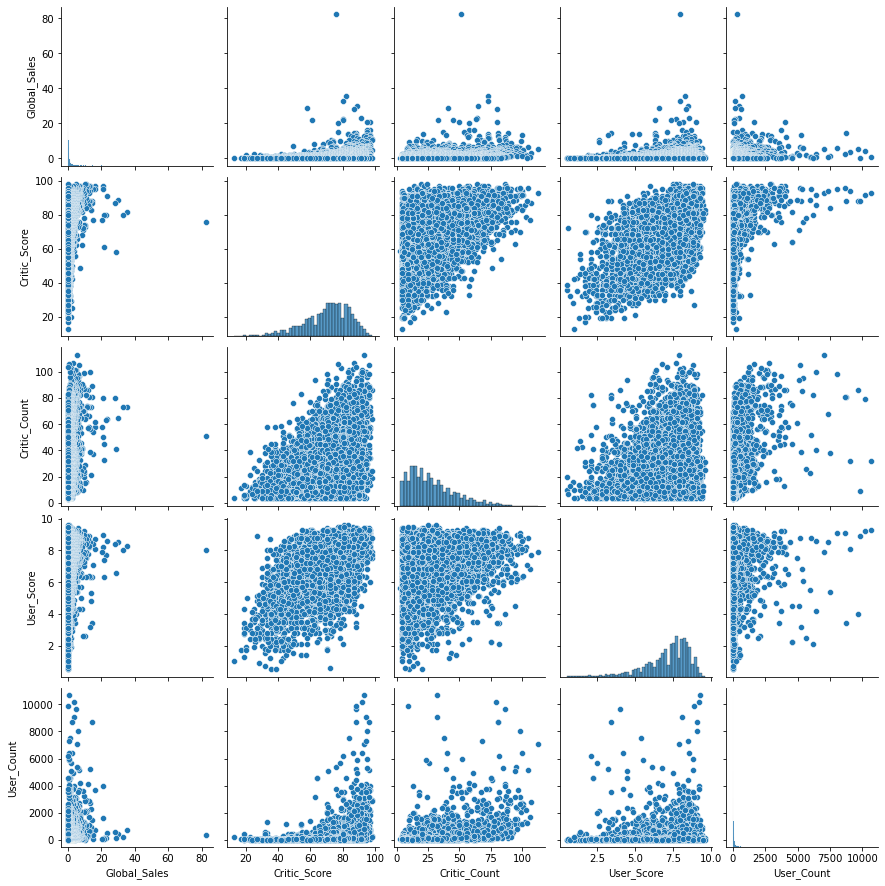

In [8]:
# з svg pairplot браузер починає гальмувати
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

За допомогою `Seaborn` також можна побудувати розподіл. Для прикладу глянемо на розподіл оцінок критиків `Critic_Score`. Для цього побудуємо __`distplot`__. За замовчуванням на графіку відображається гістограма та [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

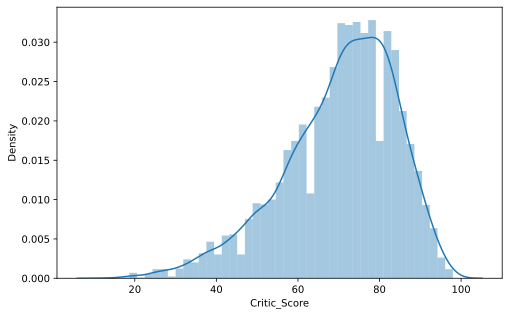

In [9]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.Critic_Score);

Для того, щоб детальніше переглянути взаємозв'язок двох чисельних ознак, є ще й __`joint_plot`__ - це гібрид `scatter plot` і `histogram` (відображаються також гістограми розподілів ознак). Нижче глянемо на те, як пов'язані між собою оцінка критиків `Critic_Score` та оцінка користувача` User_Score`.

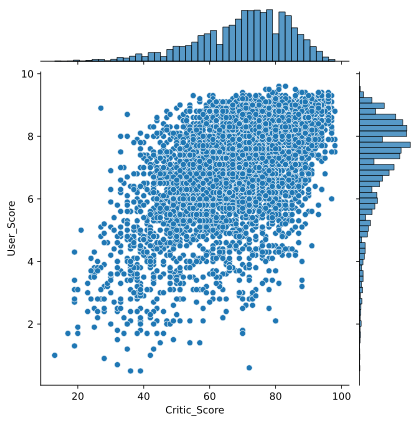

In [10]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

Ще один корисний тип графіків - це __`box plot`__. Давайте порівняємо призначені для користувача оцінки ігор для топ-5 найбільших ігрових платформ.

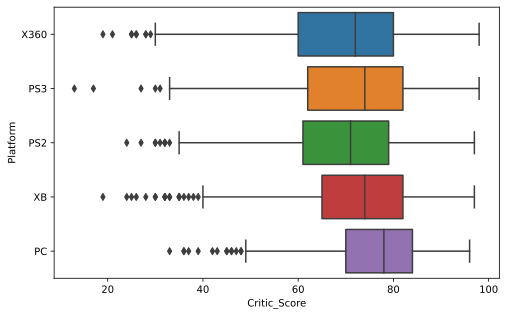

In [11]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)], orient="h");

Варто детальніше розглянути `box plot`, оскільки він часто зустрічатиметься в аналізі даних. `Box plot` складається з коробки (тому він і називається` box plot`©cap), так званих вусиків і точок. Коробка показує міжквантильний розмах розподілу, тобто 25% (`Q1`) і 75% (`Q3`) процентилю, відповідно. Відрізок всередині коробки позначає медіану розподілу.
З коробкою розібралися, перейдемо до вусиків. Вісики відображають весь розкид точок крім викидів, тобто мінімальні і максимальні значення, які потрапляють в проміжок `(Q1 - 1.5*IQR, Q3 + 1.5*IQR)`, де `IQR = Q3 - Q1` - міжквантильний розмах. Точками на графіку позначаються викиди (`outliers`) - ті значення, які не вписуються в проміжок значень, що задані вусиками графіка.

І ще один тип графіків (останній з тих, які ми розглянемо в цій лекції) - це __`heat map`__. `Heat map` дає змогу подивитися на розподіл певної чисельної ознаки за двома категоріальним. Нижче виконаємо візуалізацію сумарних продажів ігор за жанрами та ігровими платформами.

In [12]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)

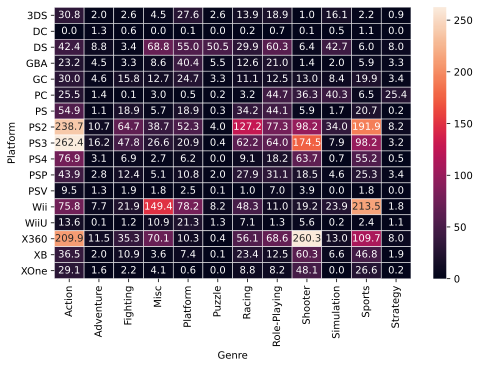

In [13]:
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

<a class="anchor" id="2.1.3"></a>

### <span style="color:blue; font-size:1em;">2.1.3. Plotly</span>

[Повернутися до змісту](#2)

Ми розглянули візуалізації на основі бібліотеки `Matplotlib`. Проте, це не єдиний варіант для побудови графіків на мові `Python`. Розглянемо також бібліотеку __`plotly`__. `Plotly` - це open-source бібліотека, яка дає змогу будувати інтерактивні графіки в jupyter.notebook'e без необхідності зариватися в `JavaScript` код.

Принада інтерактивних графіків полягає в тому, що можна переглянути точне чисельне значення при наведенні курсора мишки, приховати нецікаві ряди у візуалізації, наблизити певну ділянку графіка тощо.

Перед початком роботи виконаємо імпортування всіх необхідних модулів та ініціалізуємо `Plotly` за допомогою команди` init_notebook_mode`.

In [14]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для початку побудуємо __`line plot`__ з динамікою кількості ігор, що вийшли, та їхніми продажами за роками.

In [15]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_Games']

В `Plotly` будується візуалізація об'єкту `Figure`, який складається з даних (масив ліній `traces`) і оформлення/стилю, за який відповідає об'єкт `layout`. У простих випадках можна викликати функцію `iplot` і просто від масиву` traces`.

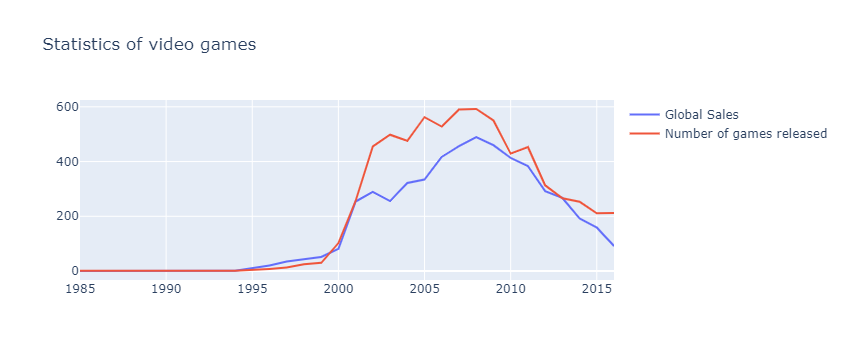

In [16]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Також можна відразу зберегти графік у вигляді html-файлу.

In [17]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False);

Подивимося також на ринкову частку ігрових платформ, що розрахована за кількістю випущених ігор і за сумарною виручкою. Для цього побудуємо __`bar chart`__.

In [18]:
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

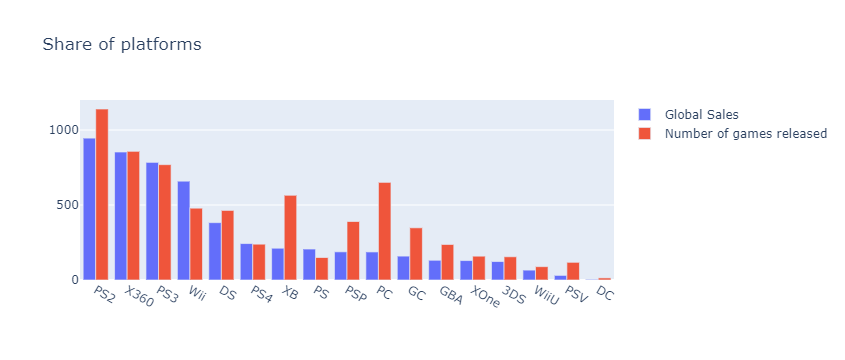

In [19]:
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

data = [trace0, trace1]
layout = {'title': 'Share of platforms'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

В `plotly` можна побудувати і __`box plot`__. Розглянемо відмінності оцінок критиків в залежності від жанру гри.

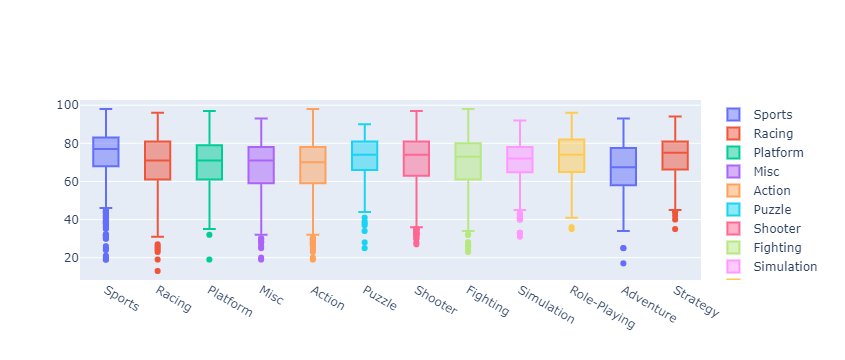

In [20]:
data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )
iplot(data, show_link = False)

В наступній частині лекції 2 опрацюємо візуальний підхід до аналізу даних за набором даних `telecom_churn.csv`. 